In [15]:
import numpy as np

def is_absorbing(state):
    return np.count_nonzero(state) == 1

def get_collisions(state):
    new_states = []
    A, B, C = state
    # Rule 1: A+B
    if A >= 1 and B >= 1:
        new_state = state.copy()
        new_state[0] -= 1
        new_state[1] -= 1
        new_state[2] += 2
        new_states.append(new_state)
    # Rule 2: B+C
    if B >= 1 and C >= 1:
        new_state = state.copy()
        new_state[0] += 2 
        new_state[1] -= 1 
        new_state[2] -= 1 
        new_states.append(new_state)
    # Rule 3: A+C
    if A >= 1 and C >= 1:
        new_state = state.copy()
        new_state[0] -= 1 
        new_state[1] += 2 
        new_state[2] -= 1 
        new_states.append(new_state)
    return new_states

def find_absorbing_state(initial_state):
    queue = [(np.array(initial_state), [np.array(initial_state)])]
    visited = set()
    
    while queue:
        current_state, path = queue.pop(0)
        state_tuple = tuple(current_state.tolist())
        if state_tuple in visited:
            continue
        visited.add(state_tuple)
        if is_absorbing(current_state):
            return current_state, path
        for new_state in get_collisions(current_state):
            if np.all(new_state >= 0) and new_state.sum() == current_state.sum():
                new_path = path + [new_state]
                queue.append((new_state, new_path))
    return None, None

initial_state = (811, 920, 412)
absorbing, collision_path = find_absorbing_state(initial_state)

if absorbing is not None:
    print("Absorbing state reached:", absorbing)
    print("Collision path:")
    for step, s in enumerate(collision_path):
        print(f"Step {step}: {s}")
else:
    print("No absorbing state was found in the search.")


Absorbing state reached: [   0 2143    0]
Collision path:
Step 0: [811 920 412]
Step 1: [810 919 414]
Step 2: [809 918 416]
Step 3: [808 917 418]
Step 4: [807 916 420]
Step 5: [806 915 422]
Step 6: [805 914 424]
Step 7: [804 913 426]
Step 8: [803 912 428]
Step 9: [802 911 430]
Step 10: [801 910 432]
Step 11: [800 909 434]
Step 12: [799 908 436]
Step 13: [798 907 438]
Step 14: [797 906 440]
Step 15: [796 905 442]
Step 16: [795 904 444]
Step 17: [794 903 446]
Step 18: [793 902 448]
Step 19: [792 901 450]
Step 20: [791 900 452]
Step 21: [790 899 454]
Step 22: [789 898 456]
Step 23: [788 897 458]
Step 24: [787 896 460]
Step 25: [786 895 462]
Step 26: [785 894 464]
Step 27: [784 893 466]
Step 28: [783 892 468]
Step 29: [782 891 470]
Step 30: [781 890 472]
Step 31: [780 889 474]
Step 32: [779 888 476]
Step 33: [778 887 478]
Step 34: [777 886 480]
Step 35: [776 885 482]
Step 36: [775 884 484]
Step 37: [774 883 486]
Step 38: [773 882 488]
Step 39: [772 881 490]
Step 40: [771 880 492]
Step 41: 

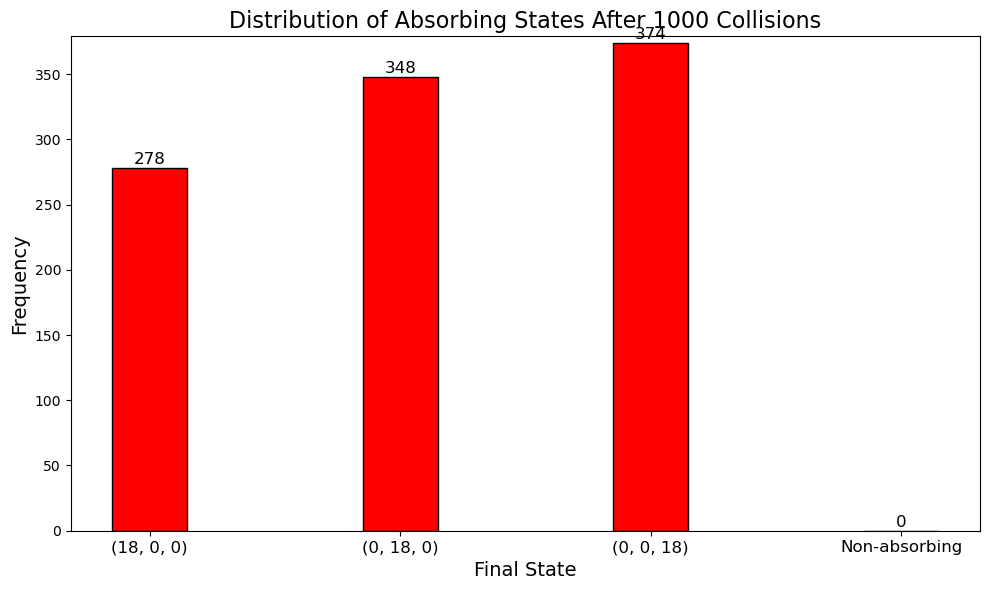

In [137]:
import numpy as np
import matplotlib.pyplot as plt

def is_absorbing(state):
    return np.count_nonzero(state) == 1

def get_valid_collisions(state):

    valid = []
    A, B, C = state
    if A >= 1 and B >= 1:
        valid.append(np.array([-1, -1, 2]))
    if B >= 1 and C >= 1:
        valid.append(np.array([2, -1, -1]))
    if A >= 1 and C >= 1:
        valid.append(np.array([-1, 2, -1]))
    return valid

def simulate_collisions(initial_state, n):

    state = np.array(initial_state, dtype=int)
    for i in range(n):
        valid = get_valid_collisions(state)
        if not valid:  
            break
        idx = np.random.choice(len(valid))
        rule = valid[idx]
        state = state + rule
        if state.sum() != np.sum(initial_state):
            break
    return state

# Parameters
n_collisions = 1000    # Number of collisions (n)
num_boxes = 1000         # Number of boxes
initial_state = (3, 6, 9)  # Initial state of each box

absorbing_counts = {}
non_absorbing = 0

for i in range(num_boxes):
    final_state = simulate_collisions(initial_state, n_collisions)
    if is_absorbing(final_state):
        state_tuple = tuple(final_state.tolist())
        absorbing_counts[state_tuple] = absorbing_counts.get(state_tuple, 0) + 1
    else:
        non_absorbing += 1

N = np.sum(initial_state)
fixed_order = [(N, 0, 0), (0, N, 0), (0, 0, N)]
categories = []
counts = []
for state in fixed_order:
    categories.append(str(state))
    counts.append(absorbing_counts.get(state, 0))

categories.append("Non-absorbing")
counts.append(non_absorbing)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(counts)), counts, color='red', edgecolor='black', width=0.3)
plt.xticks(range(len(counts)), categories, fontsize=12)
plt.xlabel("Final State", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Distribution of Absorbing States After {n_collisions} Collisions", fontsize=16)
plt.ylim(0, max(counts) + 5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
